In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for wordcloud making and image importing
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

# And libraries for data transformation
import datetime

#words counter
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import spacy
from nltk.tokenize import word_tokenize


# sentiment 
from textblob import TextBlob


In [2]:
# load data
df = pd.read_csv('tweets/sample1.csv')
df.head()

,screen_name,created_at,location,state_abb,state,source,hashtags,text
0,munn_dayle,2020-04-21 22:24:59,"Georgia, USA",GA,Georgia,Twitter for Android,NaN,Coronavirus Panel Recommends Against Use Of Hy...
1,blake31,2020-04-21 22:24:59,"Clemson, SC",SC,South Carolina,Twitter for iPhone,NaN,I swear once all this covid stuff is over I’m ...
2,thatsopheven,2020-04-21 22:24:59,"Detroit, MI",MI,Michigan,Twitter for iPhone,NaN,I will retweet any information about injustice...
3,BugKlr,2020-04-21 22:24:59,"West Virginia, USA",WV,West Virginia,Twitter for Android,NaN,No Police Raids? Syracuse Mosque Continues Hol...
4,TrewStories,2020-04-21 22:24:59,"Maine, USA",ME,Maine,Twitter Web App,NaN,If half of all US COVID-19 deaths were in Wyom...


# 1. Data preprocess

In [3]:
# Get length of review for Exploratory data analysis (EDA)
df['text_length'] = df['text'].apply(lambda x: len(x))

Text(0.5, 1.0, 'Distribution of review length')

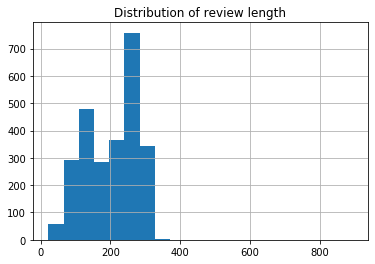

In [4]:
# And take a look at the distribution of the length
df['text_length'].hist(bins=20)
plt.title('Distribution of review length')

In [5]:
from string import punctuation
from nltk.corpus import stopwords

# Transform string data and remove punctuation and stop words
df['text_clean'] = df['text']
# lower case
df['text_clean'] = df['text_clean'].apply(lambda x: str(x).lower())
# remove punctuation
df['text_clean'] = df['text_clean'].apply(lambda x: x.translate(str.maketrans('', '', punctuation)))
# remove stop words
nltk_stop = stopwords.words('english')                                          
df['text_clean'] = df['text_clean'].apply(lambda x: ' '.join([c for c in x.split() if c not in nltk_stop]))

In [6]:
# Check the data again
df.head()

,screen_name,created_at,location,state_abb,state,source,hashtags,text,text_length,text_clean
0,munn_dayle,2020-04-21 22:24:59,"Georgia, USA",GA,Georgia,Twitter for Android,NaN,Coronavirus Panel Recommends Against Use Of Hy...,136,coronavirus panel recommends use hydroxychloro...
1,blake31,2020-04-21 22:24:59,"Clemson, SC",SC,South Carolina,Twitter for iPhone,NaN,I swear once all this covid stuff is over I’m ...,127,swear covid stuff i’m going back church that’s...
2,thatsopheven,2020-04-21 22:24:59,"Detroit, MI",MI,Michigan,Twitter for iPhone,NaN,I will retweet any information about injustice...,289,retweet information injustice toward black peo...
3,BugKlr,2020-04-21 22:24:59,"West Virginia, USA",WV,West Virginia,Twitter for Android,NaN,No Police Raids? Syracuse Mosque Continues Hol...,262,police raids syracuse mosque continues holding...
4,TrewStories,2020-04-21 22:24:59,"Maine, USA",ME,Maine,Twitter Web App,NaN,If half of all US COVID-19 deaths were in Wyom...,85,half us covid19 deaths wyoming would nyc willi...


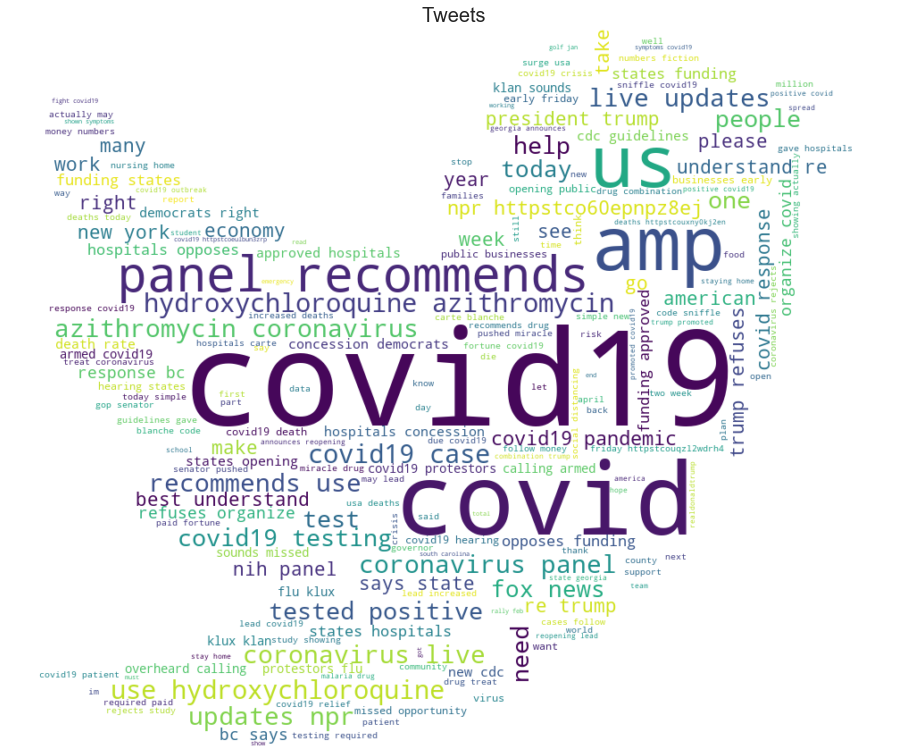

In [7]:
#words cloud of most comman words 
pos_mask = np.array(Image.open('src/twitter_mask.png'))
np.random.seed(321)
sns.set(rc={'figure.figsize':(16,16)})
text = ' '.join(df['text_clean'].tolist())

wordcloud = WordCloud(mask=pos_mask, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Tweets',size=20)
plt.show()

# 2. Sentiment
Use TextBlob for sentiment analysis

In [8]:
# TextBlob stands on the giant shoulders of NLTK and pattern, and plays nicely with both.
# Here, we only extract polarity as it indicates the sentiment 
# as value nearer to 1 means a positive sentiment 
# values nearer to -1 means a negative sentiment. 
# This can also work as a feature for building a machine learning model.
df['sentiment_score'] = df['text_clean'].apply(lambda x: TextBlob(x).sentiment[0])
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')
df['sentiment_category'] = df['sentiment_score'].apply(lambda x: 1 if x > 0 else 2 if x < 0 else 0)
df[['text_clean','sentiment_score', 'sentiment', 'sentiment_category']].head()

,text_clean,sentiment_score,sentiment,sentiment_category
0,coronavirus panel recommends use hydroxychloro...,0.136364,positive,1
1,swear covid stuff i’m going back church that’s...,-0.125000,negative,2
2,retweet information injustice toward black peo...,-0.080208,negative,2
3,police raids syracuse mosque continues holding...,0.000000,neutral,0
4,half us covid19 deaths wyoming would nyc willi...,0.041667,positive,1


In [9]:
df.head()

,screen_name,created_at,location,state_abb,state,source,hashtags,text,text_length,text_clean,sentiment_score,sentiment,sentiment_category
0,munn_dayle,2020-04-21 22:24:59,"Georgia, USA",GA,Georgia,Twitter for Android,NaN,Coronavirus Panel Recommends Against Use Of Hy...,136,coronavirus panel recommends use hydroxychloro...,0.136364,positive,1
1,blake31,2020-04-21 22:24:59,"Clemson, SC",SC,South Carolina,Twitter for iPhone,NaN,I swear once all this covid stuff is over I’m ...,127,swear covid stuff i’m going back church that’s...,-0.125000,negative,2
2,thatsopheven,2020-04-21 22:24:59,"Detroit, MI",MI,Michigan,Twitter for iPhone,NaN,I will retweet any information about injustice...,289,retweet information injustice toward black peo...,-0.080208,negative,2
3,BugKlr,2020-04-21 22:24:59,"West Virginia, USA",WV,West Virginia,Twitter for Android,NaN,No Police Raids? Syracuse Mosque Continues Hol...,262,police raids syracuse mosque continues holding...,0.000000,neutral,0
4,TrewStories,2020-04-21 22:24:59,"Maine, USA",ME,Maine,Twitter Web App,NaN,If half of all US COVID-19 deaths were in Wyom...,85,half us covid19 deaths wyoming would nyc willi...,0.041667,positive,1


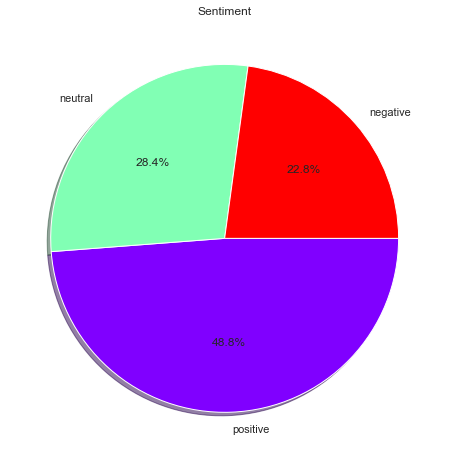

In [10]:
import matplotlib.cm as cm
plt.figure(figsize=(8,8))
#count data rating
counts = df['sentiment'].value_counts()
#rating pie
values = counts.values
labels = counts.index
explode = (0, 0, 0)
colors = cm.rainbow(np.linspace(0, 1, len(labels)))
plt.pie(values, 
        colors=colors, 
        labels=labels,
        explode=explode, 
        autopct='%1.1f%%',
        counterclock=False,
        shadow=True)
plt.title('Sentiment')
plt.show()

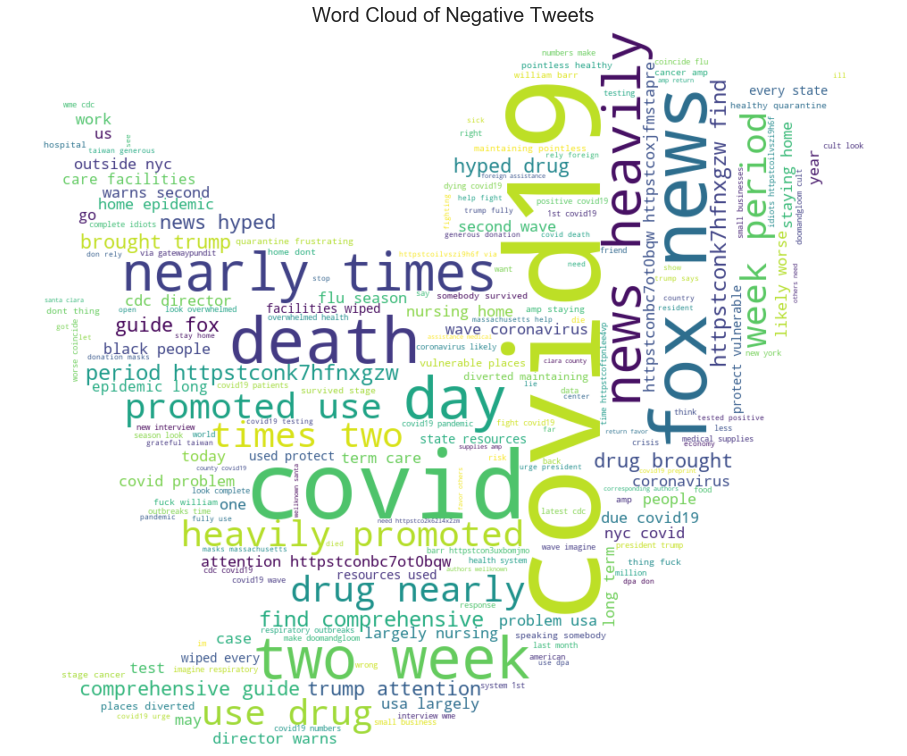

In [11]:
#words cloud of most comman words from negative tweets
pos_mask = np.array(Image.open('src/twitter_mask.png'))
np.random.seed(321)
sns.set(rc={'figure.figsize':(16,16)})
text = ' '.join(df['text_clean'][df['sentiment']=='negative'].tolist())

wordcloud = WordCloud(mask=pos_mask, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Word Cloud of Negative Tweets',size=20)
plt.show()

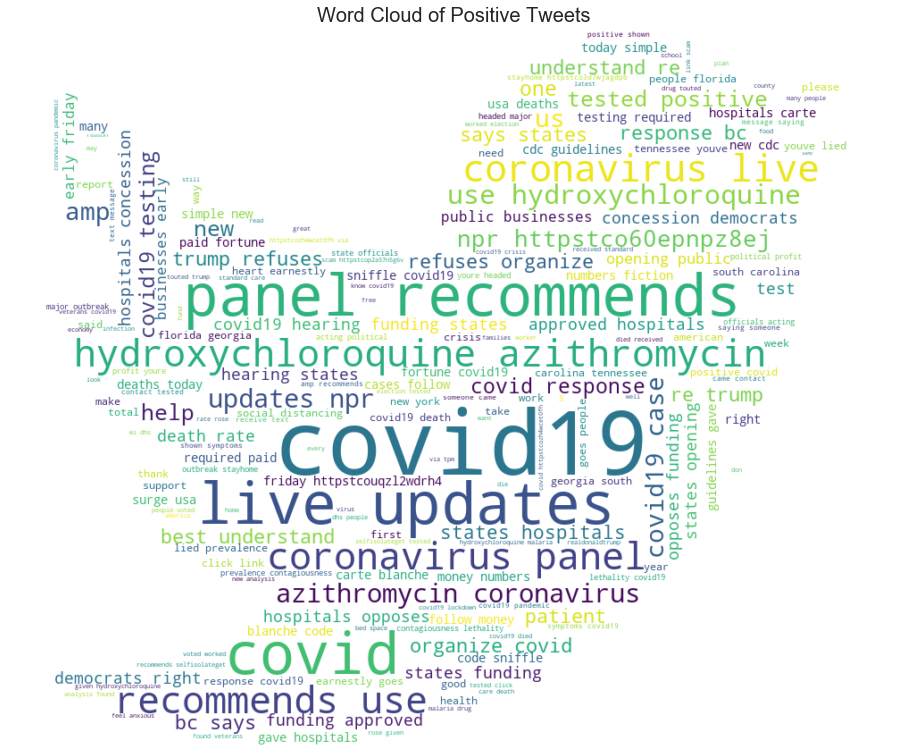

In [12]:
#words cloud of most comman words from positive tweets
pos_mask = np.array(Image.open('src/twitter_mask.png'))
np.random.seed(321)
sns.set(rc={'figure.figsize':(16,16)})
text = ' '.join(df['text_clean'][df['sentiment']=='positive'].tolist())

wordcloud = WordCloud(mask=pos_mask, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Word Cloud of Positive Tweets',size=20)
plt.show()

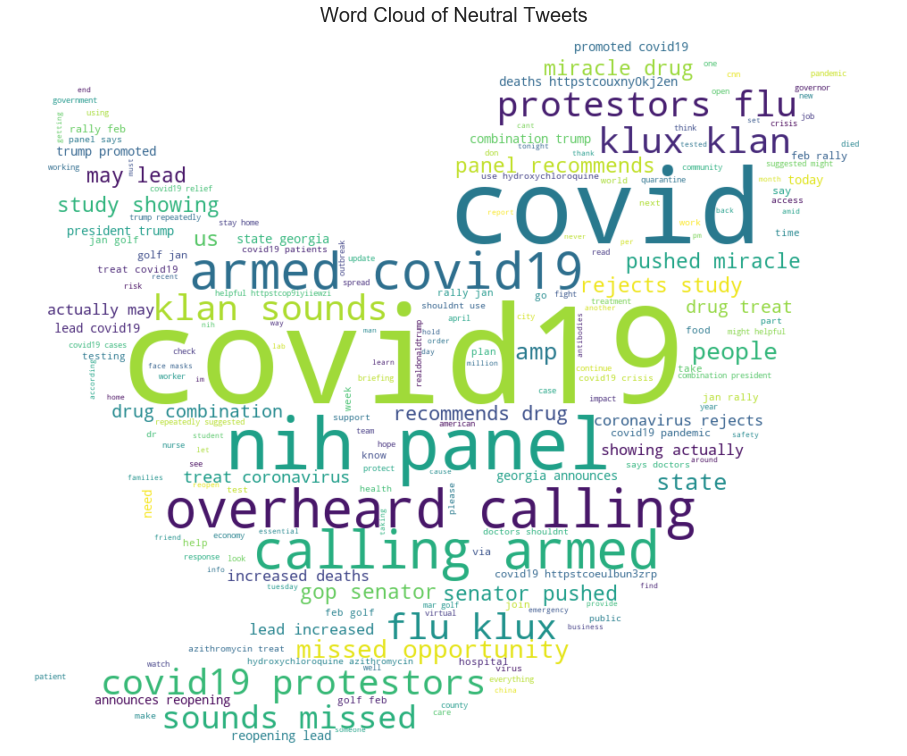

In [13]:
#words cloud of most comman words from neutral tweets
pos_mask = np.array(Image.open('src/twitter_mask.png'))
np.random.seed(321)
sns.set(rc={'figure.figsize':(16,16)})
text = ' '.join(df['text_clean'][df['sentiment']=='neutral'].tolist())

wordcloud = WordCloud(mask=pos_mask, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Word Cloud of Neutral Tweets',size=20)
plt.show()

In [16]:
Counter(df['state']).most_common()

[('California', 365),
 ('Texas', 237),
 ('New York', 167),
 ('Washington', 152),
 ('Florida', 133),
 (nan, 104),
 ('Illinois', 93),
 ('Michigan', 78),
 ('Colorado', 75),
 ('Ohio', 74),
 ('North Carolina', 73),
 ('Georgia', 68),
 ('Pennsylvania', 68),
 ('Arizona', 66),
 ('Tennessee', 64),
 ('Massachusetts', 63),
 ('Virginia', 58),
 ('New Jersey', 57),
 ('Maryland', 54),
 ('Oregon', 48),
 ('Minnesota', 46),
 ('Missouri', 38),
 ('Connecticut', 31),
 ('Wisconsin', 31),
 ('Indiana', 31),
 ('Nevada', 25),
 ('Louisiana', 21),
 ('Kansas', 21),
 ('Kentucky', 20),
 ('South Carolina', 19),
 ('New Mexico', 19),
 ('Hawaii', 18),
 ('Oklahoma', 17),
 ('Utah', 17),
 ('Iowa', 15),
 ('New Hampshire', 13),
 ('Arkansas', 13),
 ('West Virginia', 12),
 ('South Dakota', 12),
 ('Idaho', 10),
 ('Rhode Island', 10),
 ('Maine', 8),
 ('Delaware', 8),
 ('Mississippi', 7),
 ('Nebraska', 7),
 ('Montana', 6),
 ('Alabama', 5),
 ('District of Columbia', 4),
 ('Vermont', 4),
 ('Alaska', 3),
 ('North Dakota', 2),
 ('Wyom

In [26]:
from plotly.offline import iplot
from settings import states_abb
from settings import states_full
# tweets per state
tweets_perstate = np.asarray(df.groupby('state').state.count())
print(tweets_perstate)
print(states_full)
tweets_scale = [[0, 'rgb(229, 239, 245)'], [1, 'rgb(1, 97, 156)']]

data = [dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = tweets_scale,
        locations = states_full,
        locationmode = 'USA-states',
        z = tweets_perstate,
        marker = dict(
            line = dict(
                color = 'rgb(255, 255, 255)',
                width = 50)
            ),
        colorbar = dict(
            title = 'Tweets per state')
        )]

layout = dict(
         title = 'United States Heatmap of Tweets Related to COVID-19',
         geo = dict(
             scope = 'usa',
             projection = dict(type = 'albers usa'),
             countrycolor = 'rgb(255, 255, 255)',
             showlakes = True,
             lakecolor = 'rgb(255, 255, 255)')
         )

figure = dict(data = data, layout = layout)
iplot(figure)

[  5   3  66  13 365  75  31   8   4 133  68  18  10  93  31  15  21  20
  21   8  54  63  78  46   7  38   6   7  25  13  57  19 167  73   2  74
  17  48  68  10  19  12  64 237  17   4  58 152  12  31   1]
['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
